In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Explore Data

In [283]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [285]:
data.duplicated().sum()

0

In [286]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Analysis

<Axes: >

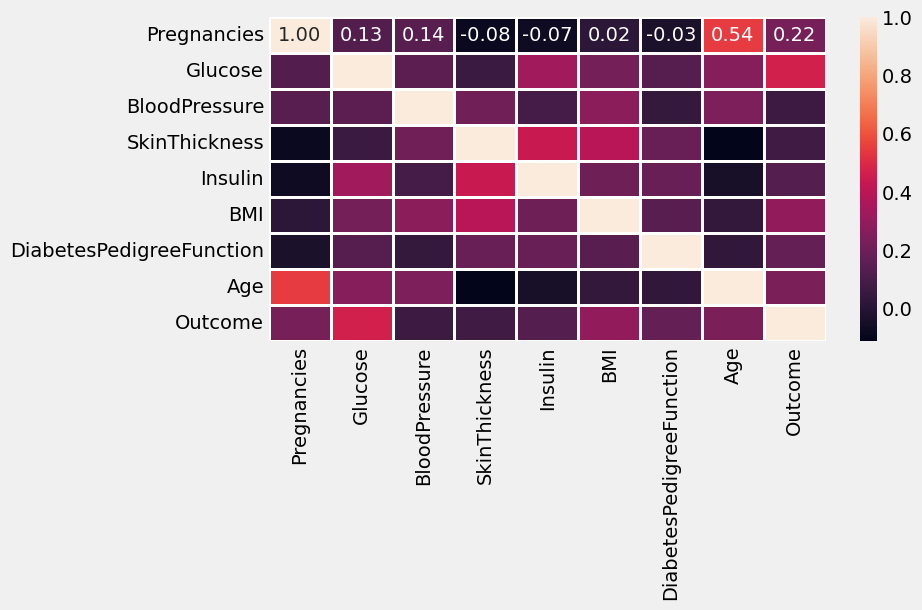

In [287]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, linewidths=1, fmt='.2f')

<Axes: xlabel='Outcome', ylabel='count'>

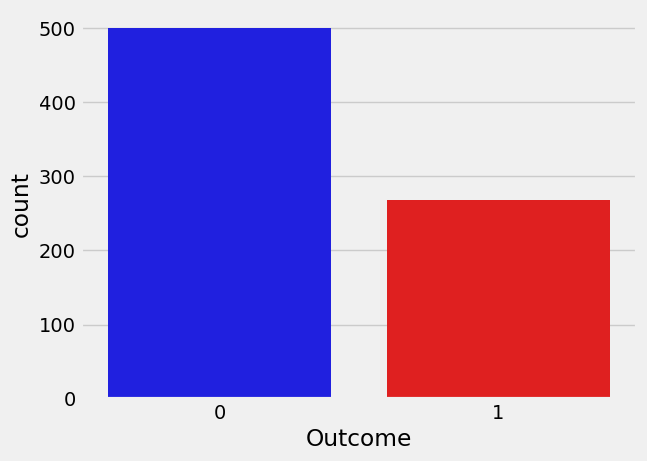

In [288]:
sns.countplot(data=data, x='Outcome', palette=['b', 'r'])

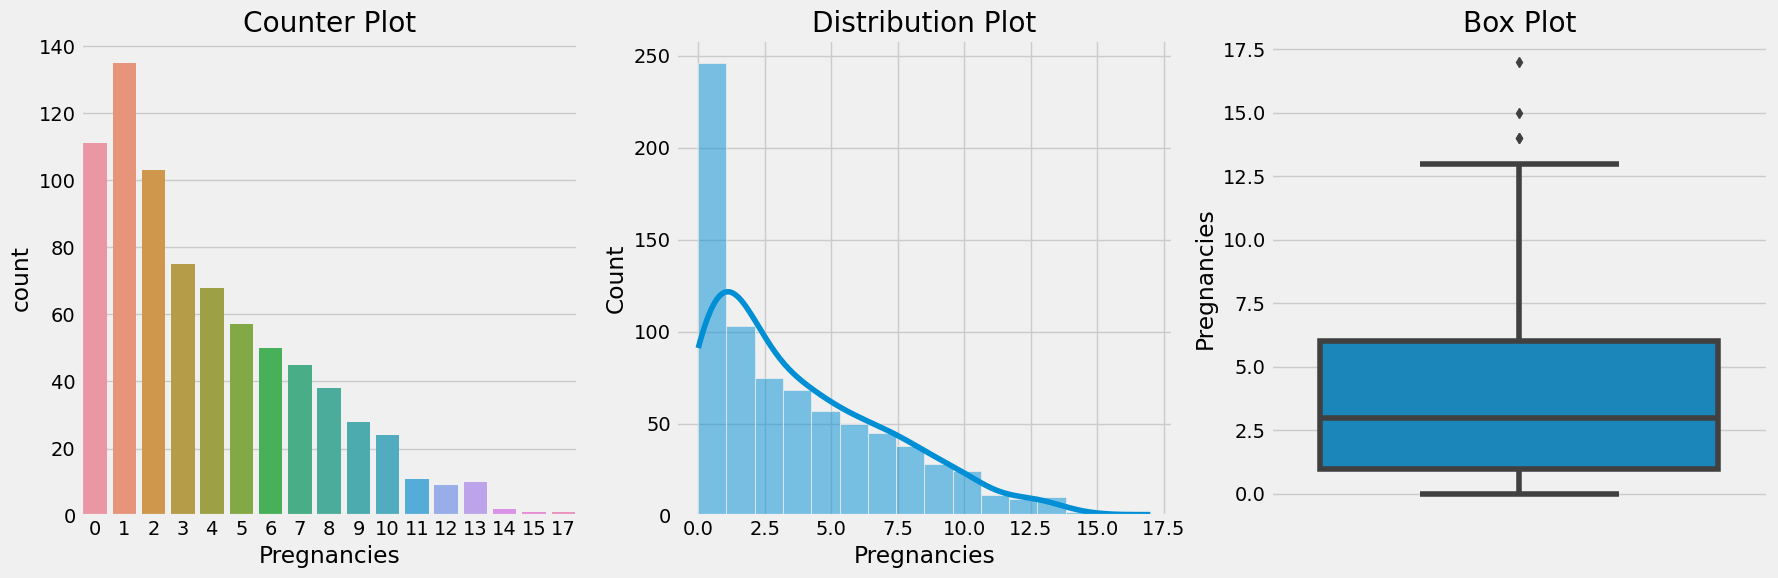

In [289]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Counter Plot')
sns.countplot(x=data['Pregnancies'])

plt.subplot(1, 3, 2)
plt.title('Distribution Plot')
sns.histplot(data['Pregnancies'], kde=True)

plt.subplot(1, 3, 3)
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])

plt.tight_layout()

<Axes: >

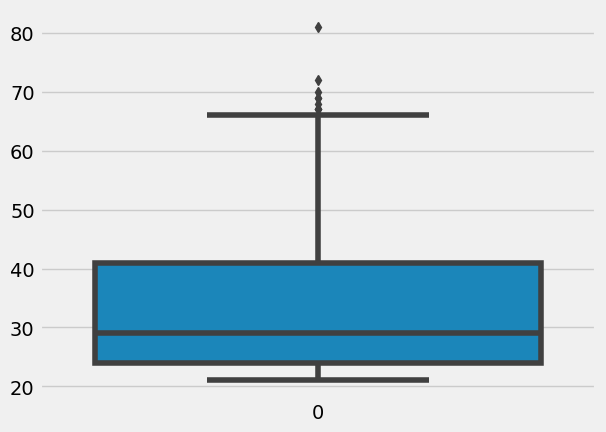

In [290]:
sns.boxplot(data['Age'])

## Modeling 

In [291]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [293]:
# model_1 = LogisticRegression()
# model_1.fit(x_train, y_train)
# pred = model_1.predict(x_test)

In [294]:
# print('accuracy_score is: ' ,f'{accuracy_score(pred, y_test):,.3}')
# print('recall_score is: ', f'{recall_score(pred, y_test):,.3}')
# print('f1_score is: ' ,f'{f1_score(pred, y_test):,.3}')
# print('confusion_matrix is: ' , confusion_matrix(pred, y_test))

<Axes: >

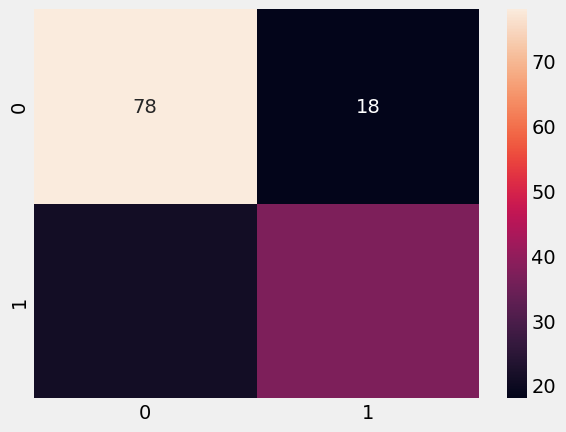

In [295]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True)

## Additional : Make fuction for Moleding Process

In [296]:
columns = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier' ]
result_accurecy = []
result_recall = []
result_f1_s = []

In [297]:


model_1 = LogisticRegression()
model_2 = SVC()
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier(n_estimators=1000)
models = [model_1, model_2, model_3, model_4]
for model in models:
    def modeling(model):
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        accuracy = accuracy_score(pred, y_test)
        recall  = recall_score(pred, y_test)
        f1_s = f1_score(pred, y_test)

        result_accurecy.append(accuracy)
        result_recall.append(recall)
        result_f1_s.append(f1_s)

        # sns.heatmap(confusion_matrix(pred, y_test), annot=True)
        print(model)
        print('accuracy_score is: ' ,f'{accuracy_score(pred, y_test):,.3}',' recall_score is: ', f'{recall_score(pred, y_test):,.3}',' f1_score is: ' ,f'{f1_score(pred, y_test):,.3}')
    modeling(model)

LogisticRegression()
accuracy_score is:  0.747  recall_score is:  0.638  f1_score is:  0.655
SVC()
accuracy_score is:  0.766  recall_score is:  0.721  f1_score is:  0.633
RandomForestClassifier()
accuracy_score is:  0.753  recall_score is:  0.649  f1_score is:  0.661
GradientBoostingClassifier(n_estimators=1000)
accuracy_score is:  0.734  recall_score is:  0.609  f1_score is:  0.655


In [298]:
result_accurecy

[0.7467532467532467,
 0.7662337662337663,
 0.7532467532467533,
 0.7337662337662337]

In [299]:
result_recall

[0.6379310344827587, 0.7209302325581395, 0.6491228070175439, 0.609375]

In [300]:
result_f1_s

[0.6548672566371682,
 0.6326530612244898,
 0.6607142857142858,
 0.6554621848739497]

In [301]:
FinalResult =pd.DataFrame({'Algorithm': columns, 'Accuracy': result_accurecy, 'Recall': result_recall, 'f1_score': result_f1_s})

In [302]:
Algorithms

,Algorithm,Accuracy,Recall,f1_score
0,LogisticRegression,0.746753,0.637931,0.654867
1,SVC,0.766234,0.720930,0.632653
2,RandomForestClassifier,0.733766,0.625000,0.630631
3,GradientBoostingClassifier,0.733766,0.609375,0.655462


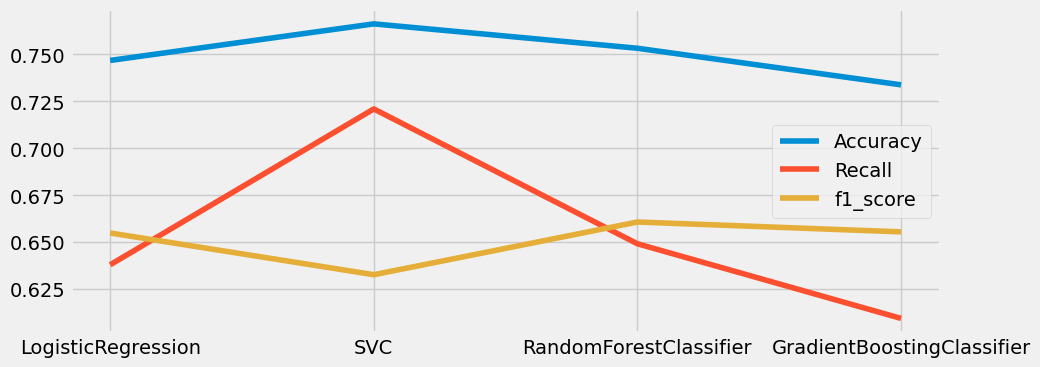

In [304]:
fig , ax = plt.subplots(figsize=(10, 4))
plt.plot(FinalResult.Algorithm, result_accurecy, label='Accuracy')
plt.plot(FinalResult.Algorithm, result_recall, label='Recall')
plt.plot(FinalResult.Algorithm, result_f1_s, label= 'f1_score')
plt.legend()